In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import numpy as np

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
# One decision tree
estimator = tree.DecisionTreeClassifier()
scores = cross_val_score(estimator, X, y, cv = 10)
scores.mean()

0.823166936558129

In [4]:
# Bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator, n_estimators = 100)
scores = cross_val_score(bag, X, y, cv = 10)

In [5]:
scores.mean()

0.9243654116675565

In [7]:
# Bagging with sqrt(d) same features in every Tree
bag = BaggingClassifier(estimator, n_estimators = 100, max_features = np.sqrt(X.shape[1])/X.shape[1])
scores = cross_val_score(bag, X, y, cv = 10)

In [8]:
np.mean(scores)

0.9371482481898958

In [9]:
# Get trees with sqrt(d) different features in every top of the tree, then bagging
estimator = tree.DecisionTreeClassifier(max_features = 'sqrt')
bag = BaggingClassifier(estimator, n_estimators = 100)

In [10]:
scores = cross_val_score(bag, X, y, cv = 10)
np.mean(scores)

0.9494065442390817

In [11]:
from sklearn.ensemble import RandomForestClassifier
estimator_1 = RandomForestClassifier()
scores = cross_val_score(estimator_1, X, y, cv = 10)

/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

In [12]:
scores.mean()

0.9188415387622786

## Random Forest Classifier researching

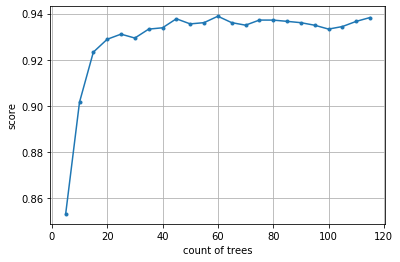

CPU times: user 748 ms, sys: 58.5 ms, total: 807 ms
Wall time: 18.3 s


In [16]:
%%time
# plot 
import matplotlib.pyplot as plt
scores = []
trees_grid = np.arange(5, 120, 5)
for n_trees in trees_grid:
    estimator = RandomForestClassifier(n_estimators = n_trees, random_state = 42, n_jobs = -1)
    scores.append(cross_val_score(estimator, X, y, cv = 5, n_jobs = -1).mean())
plt.plot(trees_grid, scores, marker = '.')
plt.xlabel('count of trees')
plt.ylabel('score')
plt.grid(True)
plt.show()

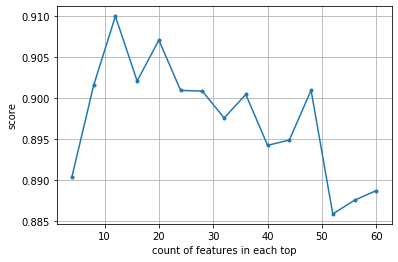

CPU times: user 521 ms, sys: 39.5 ms, total: 561 ms
Wall time: 7.22 s


In [17]:
%%time
scores = []
features_grid = np.arange(4, 64, 4)
for n_features in features_grid:
    estimator = RandomForestClassifier(max_features = n_features,random_state = 42, n_jobs = -1)
    scores.append(cross_val_score(estimator, X, y, cv = 5, n_jobs = -1).mean())
plt.plot(features_grid, scores, marker = '.')
plt.xlabel('count of features in each top')
plt.ylabel('score')
plt.grid(True)
plt.show()

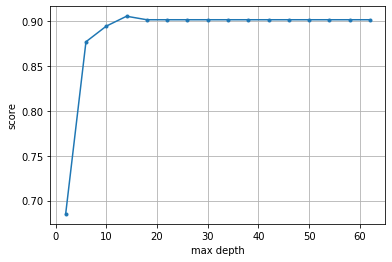

CPU times: user 602 ms, sys: 47.2 ms, total: 649 ms
Wall time: 7.49 s


In [18]:
%%time
scores = []
depth_grid = np.arange(2, 64, 4)
for n_depth in depth_grid:
    estimator = RandomForestClassifier(max_depth = n_depth, random_state = 42, n_jobs = -1)
    scores.append(cross_val_score(estimator, X, y, cv = 5, n_jobs = -1).mean())
plt.plot(depth_grid, scores, marker = '.')
plt.xlabel('max depth')
plt.ylabel('score')
plt.grid(True)
plt.show()

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).